#  Capstone Project - Health Insurance Cross Sell Prediction - Emmanuel A. Batista

This is the case of an Insurance Company which wants to know which clients in next year would desire to also acquire Vehicle Insurance, the link of the data is here: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction?select=train.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Data Loading
hic_data = pd.read_csv('C:/Users/Emmanuel/Documents/Universidad/Incursión/Coursera/Advanced Data Science IBM/Captsone Project/Data/train.csv')
print(hic_data.columns)

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


## Exploring Data ##

In [3]:
hic_data.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [4]:
hic_data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [12]:
def count_unique(hic_data, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(hic_data[col].value_counts())
#id not included
cat_cols = ['Gender','Age','Driving_License',
            'Previously_Insured','Vehicle_Age','Vehicle_Damage',
           'Annual_Premium','Policy_Sales_Channel','Vintage','Response']

count_unique(hic_data,cat_cols)


For column Gender
Male      206089
Female    175020
Name: Gender, dtype: int64

For column Age
24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64

For column Driving_License
1    380297
0       812
Name: Driving_License, dtype: int64

For column Previously_Insured
0    206481
1    174628
Name: Previously_Insured, dtype: int64

For column Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

For column Vehicle_Damage
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

For column Annual_Premium
2630.0     64877
69856.0      140
39008.0       41
38287.0       38
45179.0       38
           ...  
62326.0        1
59733.0        1
55934.0        1
75387.0        1
53346.0        1
Name: Annual_Premium, Length: 48838, dtype: int64

For column Policy_Sales_Channel
152.0    134784
26.0      79700
124.0     73995
160

In [11]:
count_unique(hic_data,['Region_Code']) # Made separately to better visualize


For column Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64


### Important Notes ###
From the frequency tables above we can see that there are some imbalances, and too much different values in some categories, to deal with this there are some adjustments that can be made:
1. For Column Age, can be done a grouping by age ranges, e.g.: 20-24, 25-29...
2. For Annual_Premium, it is the amount paid for this plan, it is in Rs (INR)
3. Vehicle Age will be transformed to ordinal first
4. Column Policy_Sales_Channel will also be grouped
5. Vintaje, will also be grouped by ranges (of days). It is well distributed, but as there are many different values, the feature vectures would be more handy if the number of values here is reduced.
6. Region codes will also be transformed to ranges.

-----The most of this changes are to reduce the size of the ONE HOT vectors----

In [26]:
# To generate the categories lets get the minimum and maximal 
# value of each numerical category
def count_minmax(hic_data, cols):
    for col in cols:
        print('\n' + col)
        print('Max ', hic_data[col].max())
        print('Min ', hic_data[col].min())
cat_cols = ['Age','Policy_Sales_Channel','Vintage','Region_Code']

count_minmax(hic_data,cat_cols)


Age
Max  85
Min  20

Policy_Sales_Channel
Max  163.0
Min  1.0

Vintage
Max  299
Min  10

Region_Code
Max  52.0
Min  0.0


### Categories ###
Now, lets make some graphs to observe in an easier way the umbalances

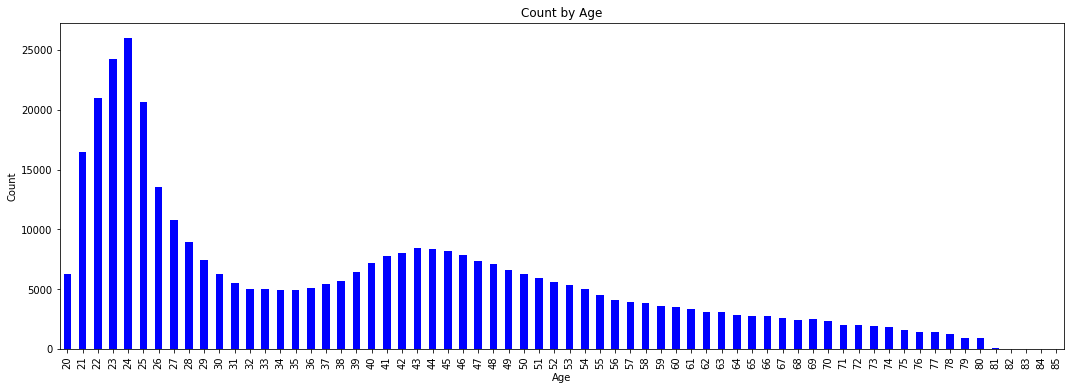

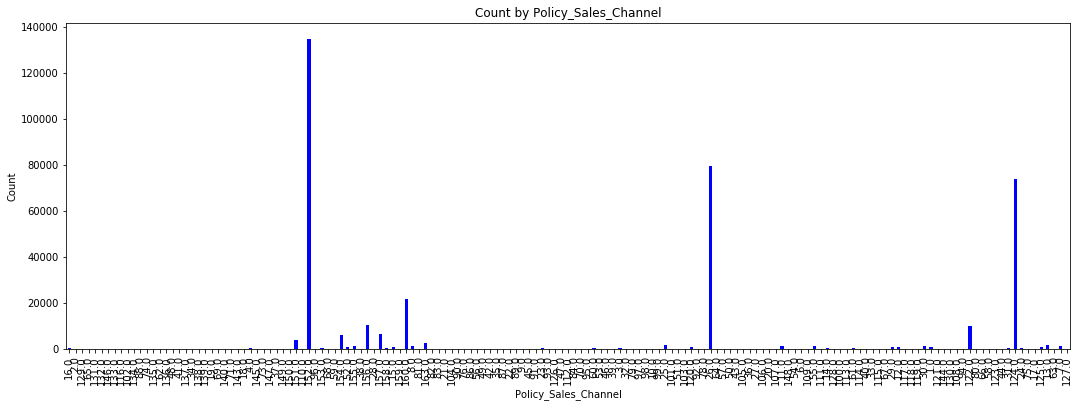

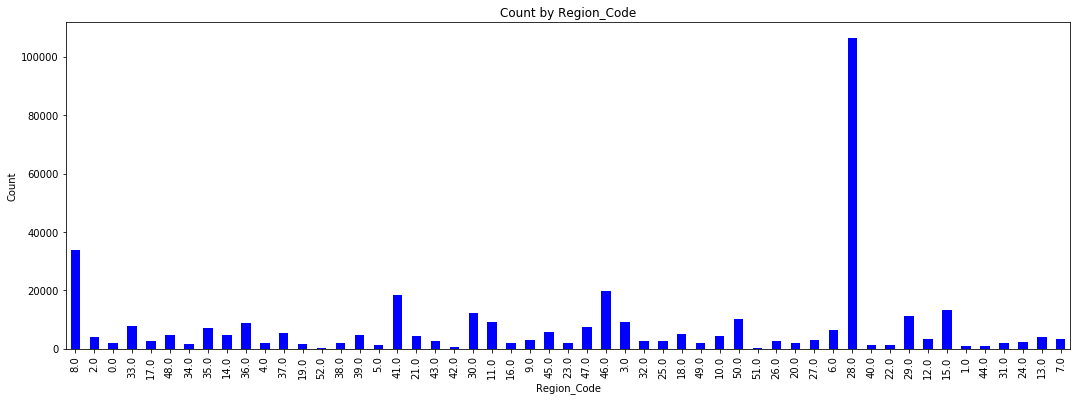

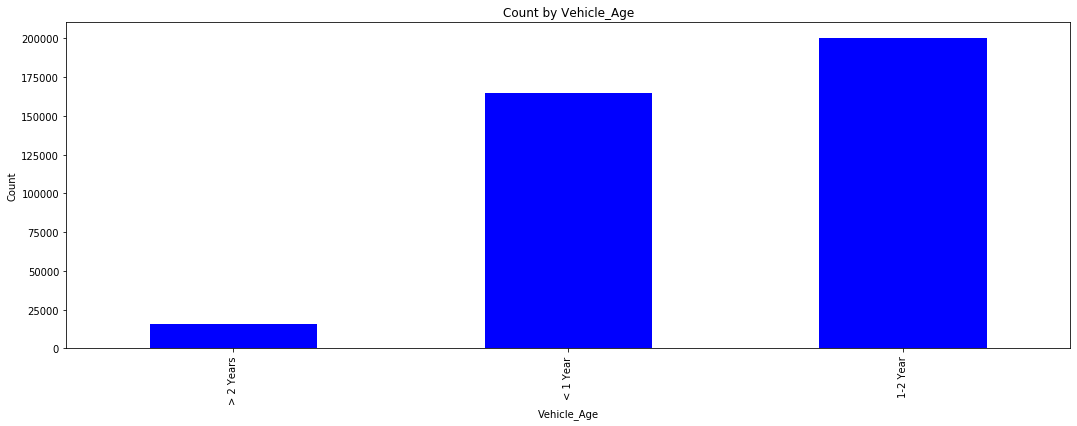

In [44]:
def plot_bars(hic_data, cols):
    for col in cols:
        fig = plt.figure(figsize=(18,6)) # define plot area
        ax = fig.gca() # define axis
        # find the counts for each unique category
        #hic_ordered = hic_data[col].sort_values(ascending=True)
        counts = hic_data[col].value_counts(sort = False) 
        # Use the plot.bar method on the counts data frame
        counts.plot.bar(ax = ax, color = 'blue') 
        ax.set_title('Count by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Count')# Set text for y axis
        plt.show()
#Selected categories
plot_cols = ['Age','Policy_Sales_Channel','Region_Code','Vehicle_Age']
plot_bars(hic_data, plot_cols)

In [61]:
# The format on Count by Region_Code and Policy_Sales_Channel can't be ordered, so we will format it first
valtest = hic_data['Region_Code']
kint = valtest.size
valtest2=[]
for k in range(kint):
    valtest2.append(int(valtest[k]))
valtest2 = pd.DataFrame(valtest2,columns=['Region_Code'])
valtest2.head()

,Region_Code
0,28
1,3
2,28
3,11
4,41


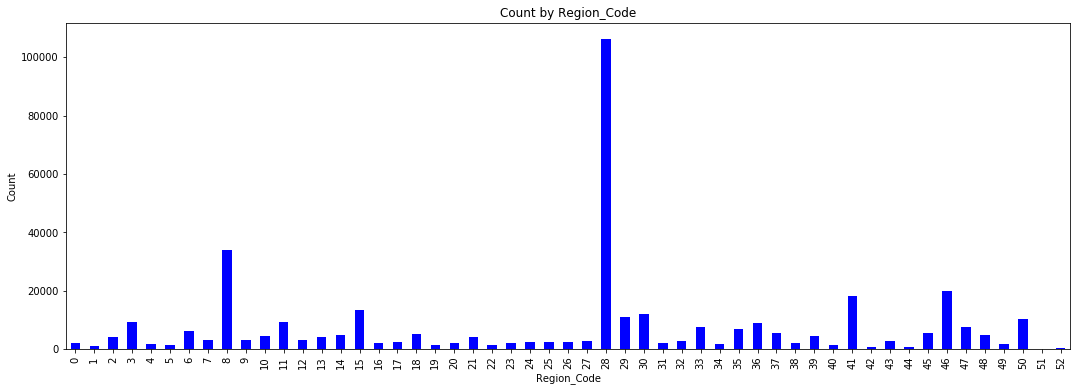

In [58]:
plot_bars(valtest2, ['Region_Code']) # It seems successful

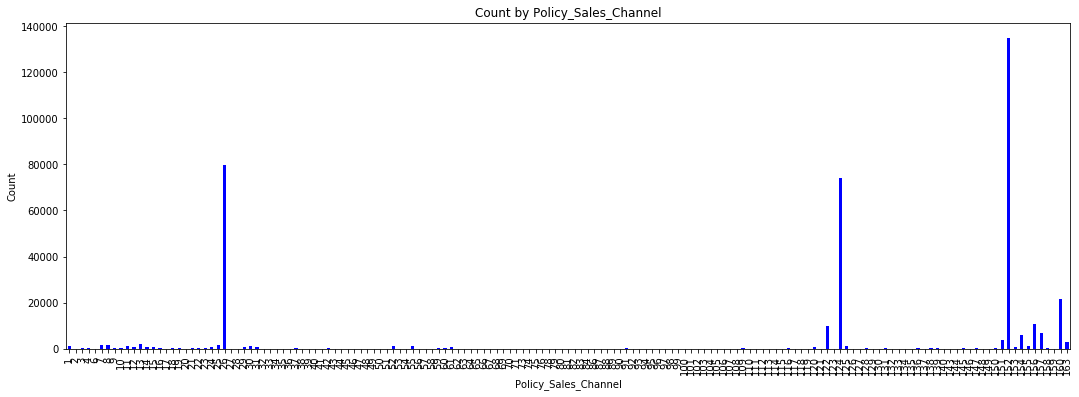

In [60]:
# Now lets replicate it to Policy_Sales_Channel
valtest = hic_data['Policy_Sales_Channel']
kint = valtest.size
valtest3=[]
for k in range(kint):
    valtest3.append(int(valtest[k]))
valtest3 = pd.DataFrame(valtest3,columns=['Policy_Sales_Channel'])
plot_bars(valtest3, ['Policy_Sales_Channel'])

In [62]:
# Re-assignment of values
hic_data['Policy_Sales_Channel'] = valtest3
hic_data['Region_Code'] = valtest2

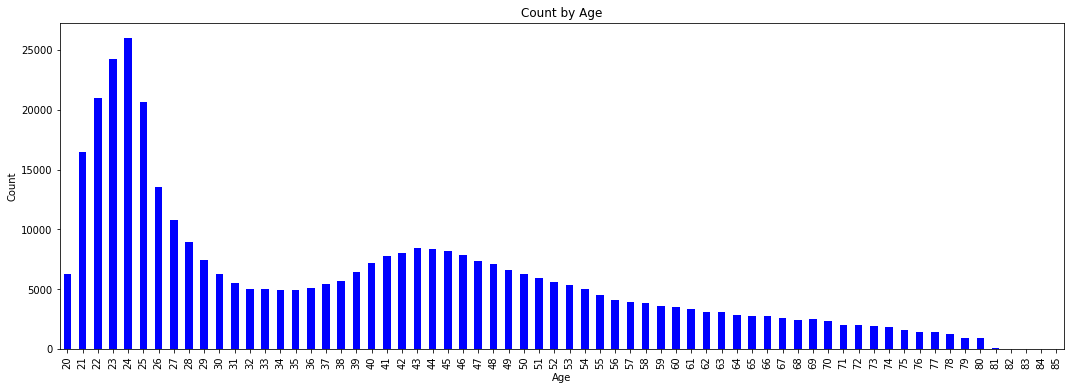

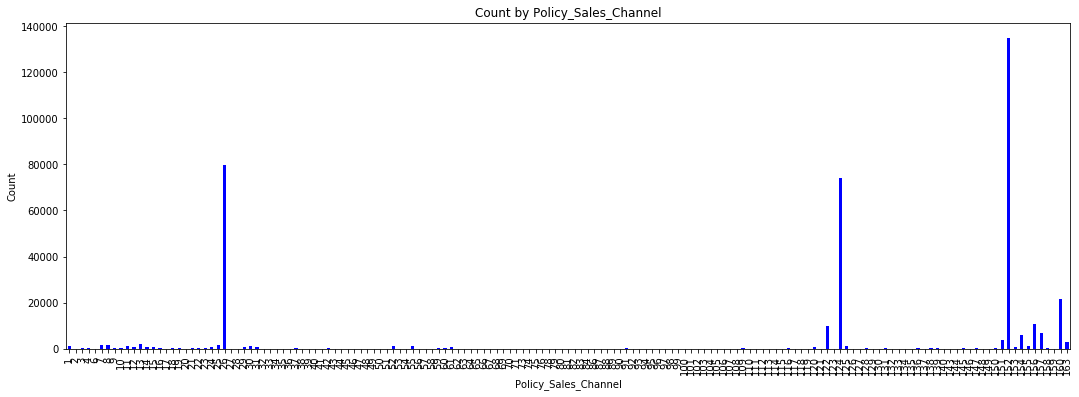

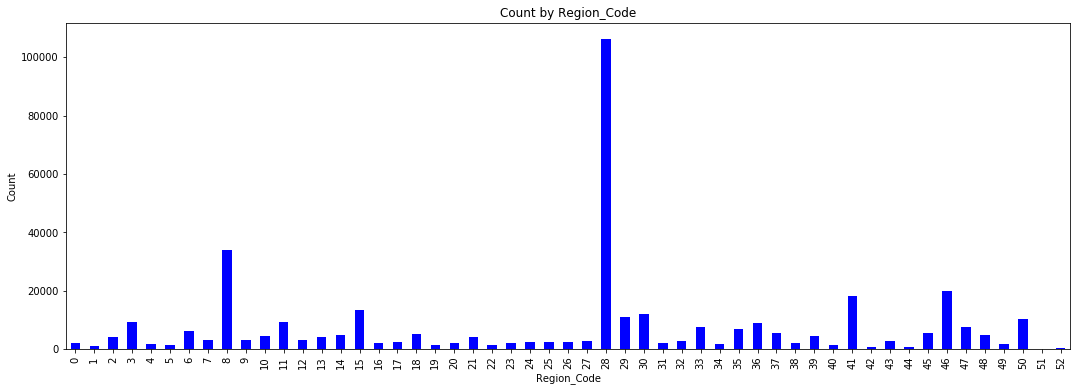

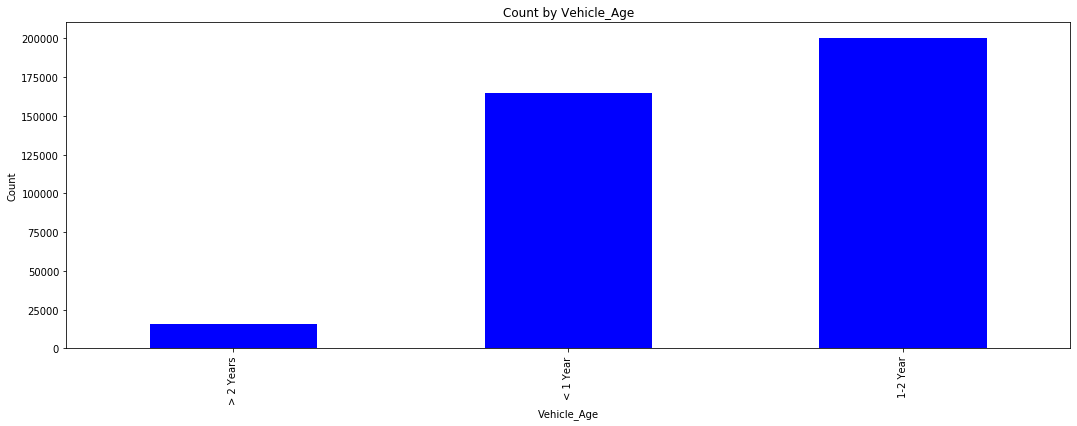

In [63]:
def plot_bars(hic_data, cols):
    for col in cols:
        fig = plt.figure(figsize=(18,6)) # define plot area
        ax = fig.gca() # define axis
        # find the counts for each unique category
        #hic_ordered = hic_data[col].sort_values(ascending=True)
        counts = hic_data[col].value_counts(sort = False) 
        # Use the plot.bar method on the counts data frame
        counts.plot.bar(ax = ax, color = 'blue') 
        ax.set_title('Count by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Count')# Set text for y axis
        plt.show()
#Selected categories
plot_cols = ['Age','Policy_Sales_Channel','Region_Code','Vehicle_Age']
plot_bars(hic_data, plot_cols)

## Data Transformation ##

In [72]:
# Now we will transform these in numerical ordinal values, let's begin with: Age [I WILL USE AN UNOPTIMAL CODE FOR THIS]
# We can observe that the higher frequencies are at 20 to 28, for this reason this years are going to considered separatedly,
# Later categories will be grouped by 5 year intervals
# So, this variable will be encoded in the next way:
#    20: 1   26: 7    31-35: 12     56-60: 17      81-85: 22 
#    21: 2   27: 8    36-40: 13     61-65: 18         
#    22: 3   28: 9    41-45: 14     66-70: 19       
#    23: 4   29: 10   46-50: 15     71-75: 20  
#    24: 5   30: 11   51-55: 16     76-80: 21   
#    25: 6      
age_encode = []
datasize = hic_data['Age'].size
for kint in range(datasize): # Loop for Ranges
    if (hic_data['Age'][kint] ==20):
        age_encode.append(1)
    elif (hic_data['Age'][kint] ==21):
        age_encode.append(2)
    elif (hic_data['Age'][kint] ==22):
        age_encode.append(3)
    elif (hic_data['Age'][kint] ==23):
        age_encode.append(4)
    elif (hic_data['Age'][kint] ==24):
        age_encode.append(5)
    elif (hic_data['Age'][kint] ==25):
        age_encode.append(6)
    elif (hic_data['Age'][kint] ==26):
        age_encode.append(7)
    elif (hic_data['Age'][kint] ==27):
        age_encode.append(8)
    elif (hic_data['Age'][kint] ==28):
        age_encode.append(9)
    elif (hic_data['Age'][kint] ==29):
        age_encode.append(10)
    elif (hic_data['Age'][kint] ==30):
        age_encode.append(11)  
    
    elif (hic_data['Age'][kint] >=31 and hic_data['Age'][kint] <=35):
        age_encode.append(12)
    elif (hic_data['Age'][kint] >=36 and hic_data['Age'][kint] <=40):
        age_encode.append(13)
    elif (hic_data['Age'][kint] >=41 and hic_data['Age'][kint] <=45):
        age_encode.append(14)
    elif (hic_data['Age'][kint] >=46 and hic_data['Age'][kint] <=50):
        age_encode.append(15)
    elif (hic_data['Age'][kint] >=51 and hic_data['Age'][kint] <=55):
        age_encode.append(16)
    elif (hic_data['Age'][kint] >=56 and hic_data['Age'][kint] <=60):
        age_encode.append(17)
    elif (hic_data['Age'][kint] >=61 and hic_data['Age'][kint] <=65):
        age_encode.append(18)
    elif (hic_data['Age'][kint] >=66 and hic_data['Age'][kint] <=70):
        age_encode.append(19)
    elif (hic_data['Age'][kint] >=71 and hic_data['Age'][kint] <=75):
        age_encode.append(20)
    elif (hic_data['Age'][kint] >=76 and hic_data['Age'][kint] <=80):
        age_encode.append(21)
    elif (hic_data['Age'][kint] >=81 and hic_data['Age'][kint] <=85):
        age_encode.append(22)
age_encode = pd.DataFrame(age_encode,columns=['Age'])
age_encode.head(15)

,Age
0,14
1,21
2,15
3,2
4,10
5,5
6,4
7,17
8,5
9,12


In [76]:
hic_data['Age']=age_encode #[Now we have 22 ordinals; will be used in OHE]
hic_data['Age'].head()

0    14
1    21
2    15
3     2
4    10
Name: Age, dtype: int64

In [80]:
# Now we will convert Vehicle_Age to ordinal
from sklearn import preprocessing
print(hic_data['Vehicle_Age'].unique())
vehage_encode = hic_data['Vehicle_Age']
enc = preprocessing.LabelEncoder()
enc.fit(vehage_encode) # Generate ordinal labels
vehage_encode = enc.transform(vehage_encode)
vehage_encode = pd.DataFrame(vehage_encode,columns=['Vehicle_Age'])
vehage_encode.head()

['> 2 Years' '1-2 Year' '< 1 Year']


,Vehicle_Age
0,2
1,0
2,2
3,1
4,1


In [86]:
hic_data['Vehicle_Age']=vehage_encode #[Now we have 3 ordinals; will be used in OHE]
hic_data['Vehicle_Age'].head()

0    2
1    0
2    2
3    1
4    1
Name: Vehicle_Age, dtype: int32

In [82]:
# Now we will convert Policy_Sales_Channel to ordinal
# We can observe that the higher frequencies are at 26, 124, 152, 156, 160
#     this values are going to be separated from rest
# Other categories will be grouped by 15 ordinal intervals
# So, this variable will be encoded in the next way:
#    1-15:         0    61-75:           5    124                        10
#    16-30 not 26: 1    76-90:           6    136-150:                   11
#    26:           2    91-105:          7    151-163 not 152, 156, 160: 12
#    31-45:        3    106-120:         8    152:                       13
#    46-60:        4    121-135 not 124: 9    156:                       14
#                                             160:                       15 
policy_encode = []
datasize = hic_data['Policy_Sales_Channel'].size
for kint in range(datasize): # Loop for Ranges
    if (hic_data['Policy_Sales_Channel'][kint] >=1 and hic_data['Policy_Sales_Channel'][kint] <=15):
        policy_encode.append(0)
    elif (hic_data['Policy_Sales_Channel'][kint] >=16 and hic_data['Policy_Sales_Channel'][kint] <=30 
          and hic_data['Policy_Sales_Channel'][kint] != 26 ):
        policy_encode.append(1)
    elif (hic_data['Policy_Sales_Channel'][kint] ==26):
        policy_encode.append(2)
    elif (hic_data['Policy_Sales_Channel'][kint] >=31 and hic_data['Policy_Sales_Channel'][kint] <=45):
        policy_encode.append(3)
    elif (hic_data['Policy_Sales_Channel'][kint] >=46 and hic_data['Policy_Sales_Channel'][kint] <=60):
        policy_encode.append(4)
    elif (hic_data['Policy_Sales_Channel'][kint] >=61 and hic_data['Policy_Sales_Channel'][kint] <=75):
        policy_encode.append(5)
    elif (hic_data['Policy_Sales_Channel'][kint] >=76 and hic_data['Policy_Sales_Channel'][kint] <=90):
        policy_encode.append(6)
    elif (hic_data['Policy_Sales_Channel'][kint] >=91 and hic_data['Policy_Sales_Channel'][kint] <=105):
        policy_encode.append(7)
    elif (hic_data['Policy_Sales_Channel'][kint] >=106 and hic_data['Policy_Sales_Channel'][kint] <=120):
        policy_encode.append(8)
    elif (hic_data['Policy_Sales_Channel'][kint] >=121 and hic_data['Policy_Sales_Channel'][kint] <=135 
          and hic_data['Policy_Sales_Channel'][kint] != 124 ):
        policy_encode.append(9)
    elif (hic_data['Policy_Sales_Channel'][kint] ==124):
        policy_encode.append(10)
    elif (hic_data['Policy_Sales_Channel'][kint] >=136 and hic_data['Policy_Sales_Channel'][kint] <=150):
        policy_encode.append(11)
    elif (hic_data['Policy_Sales_Channel'][kint] >=151 and hic_data['Policy_Sales_Channel'][kint] <=163 
          and hic_data['Policy_Sales_Channel'][kint] != 152 and hic_data['Policy_Sales_Channel'][kint] != 156
          and hic_data['Policy_Sales_Channel'][kint] != 160):
        policy_encode.append(12)
    elif (hic_data['Policy_Sales_Channel'][kint] ==152):
        policy_encode.append(13)
    elif (hic_data['Policy_Sales_Channel'][kint] ==156):
        policy_encode.append(14)
    elif (hic_data['Policy_Sales_Channel'][kint] ==160):
        policy_encode.append(15)
        
policy_encode = pd.DataFrame(policy_encode,columns=['Policy_Sales_Channel'])
policy_encode.head(15)

,Policy_Sales_Channel
0,2
1,2
2,2
3,13
4,13
5,15
6,13
7,2
8,13
9,13


In [83]:
count_unique(policy_encode,['Policy_Sales_Channel']) # Now is better


For column Policy_Sales_Channel
13    134784
2      79700
10     73995
12     21839
15     21779
9      11718
0      11020
14     10661
1       6714
4       3301
8       1582
11      1333
3       1254
5        810
7        420
6        199
Name: Policy_Sales_Channel, dtype: int64


In [88]:
hic_data['Policy_Sales_Channel']=policy_encode #[Now we have 16 ordinals; will be used in OHE]
hic_data['Policy_Sales_Channel'].head()

0     2
1     2
2     2
3    13
4    13
Name: Policy_Sales_Channel, dtype: int64

In [89]:
# Now we will convert Region_Code to ordinal
# Other categories will be grouped by 4 ordinal intervals
# So, this variable will be encoded in the next way:
#    0-4:   0    21-24:  5   41-44: 10
#    5-8:   1    25-28:  6   45-48: 11
#    9-12:  2    29-32:  7   49-52: 12
#    13-16: 3    33-36:  8
#    17-20: 4    37-40:  9
region_encode = []
datasize = hic_data['Region_Code'].size
for kint in range(datasize): # Loop for Ranges
    if (hic_data['Region_Code'][kint] >=0 and hic_data['Region_Code'][kint] <=4):
        region_encode.append(0)
    elif (hic_data['Region_Code'][kint] >=5 and hic_data['Region_Code'][kint] <=8):
        region_encode.append(1)
    elif (hic_data['Region_Code'][kint] >=9 and hic_data['Region_Code'][kint] <=12):
        region_encode.append(2)
    elif (hic_data['Region_Code'][kint] >=13 and hic_data['Region_Code'][kint] <=16):
        region_encode.append(3)
    elif (hic_data['Region_Code'][kint] >=17 and hic_data['Region_Code'][kint] <=20):
        region_encode.append(4)
    elif (hic_data['Region_Code'][kint] >=21 and hic_data['Region_Code'][kint] <=24):
        region_encode.append(5)
    elif (hic_data['Region_Code'][kint] >=25 and hic_data['Region_Code'][kint] <=28):
        region_encode.append(6)
    elif (hic_data['Region_Code'][kint] >=29 and hic_data['Region_Code'][kint] <=32):
        region_encode.append(7)
    elif (hic_data['Region_Code'][kint] >=33 and hic_data['Region_Code'][kint] <=36):
        region_encode.append(8)
    elif (hic_data['Region_Code'][kint] >=37 and hic_data['Region_Code'][kint] <=40):
        region_encode.append(9)
    elif (hic_data['Region_Code'][kint] >=41 and hic_data['Region_Code'][kint] <=44):
        region_encode.append(10)
    elif (hic_data['Region_Code'][kint] >=45 and hic_data['Region_Code'][kint] <=48):
        region_encode.append(11)
    elif (hic_data['Region_Code'][kint] >=49 and hic_data['Region_Code'][kint] <=52):
        region_encode.append(12)
region_encode = pd.DataFrame(region_encode,columns=['Region_Code'])
region_encode.head(15)

,Region_Code
0,6
1,0
2,6
3,2
4,10
5,8
6,2
7,6
8,0
9,1


In [91]:
hic_data['Region_Code']=region_encode #[Now we have 13 ordinals; will be used in OHE]
hic_data['Region_Code'].head()

0     6
1     0
2     6
3     2
4    10
Name: Region_Code, dtype: int64

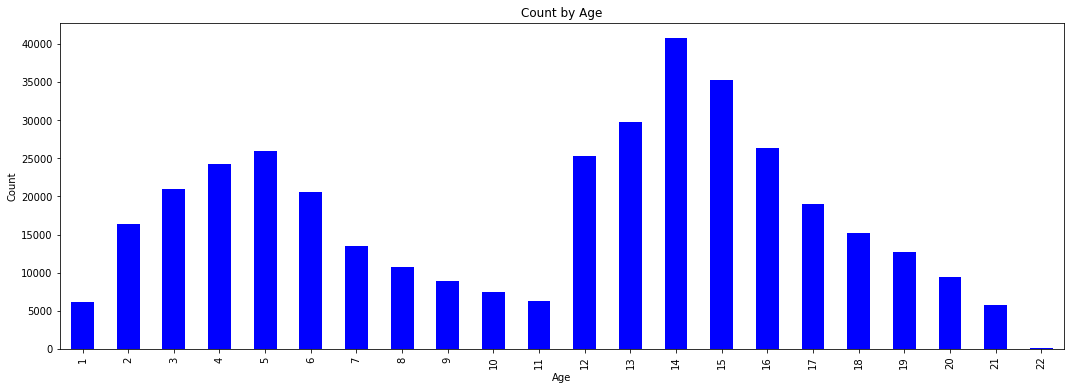

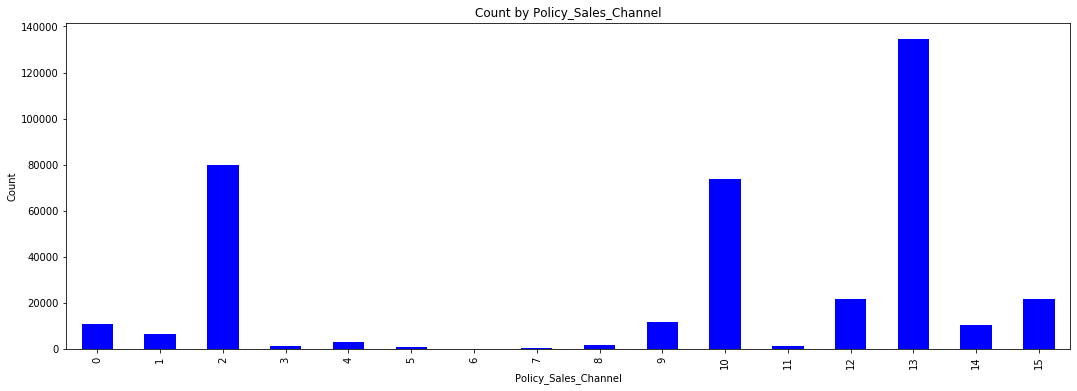

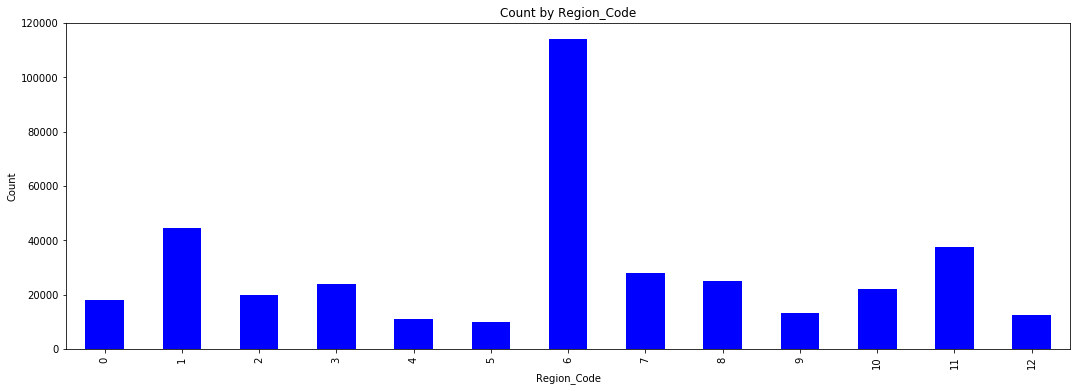

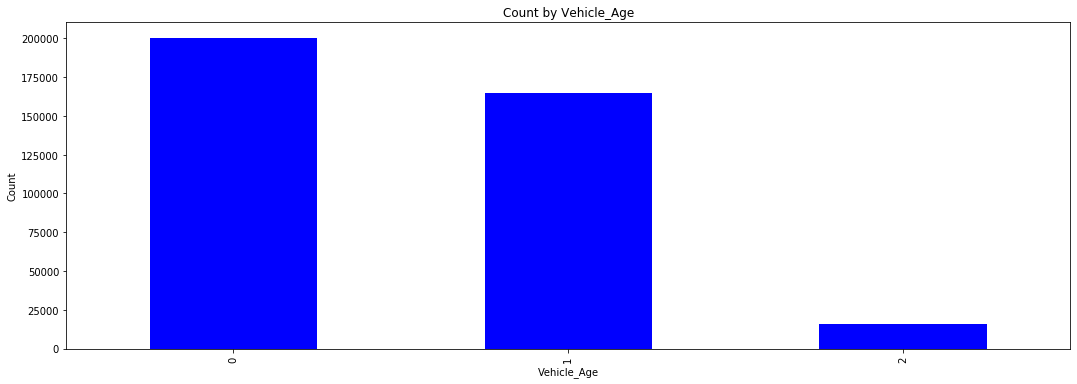

In [92]:
# Lets plot again to say the new data
plot_cols = ['Age','Policy_Sales_Channel','Region_Code','Vehicle_Age']
plot_bars(hic_data, plot_cols)

In [93]:
fin_cols = ['Gender','Age','Driving_License',
            'Previously_Insured','Vehicle_Age','Vehicle_Damage',
           'Annual_Premium','Policy_Sales_Channel','Vintage','Response']

count_unique(hic_data,fin_cols)


For column Gender
Male      206089
Female    175020
Name: Gender, dtype: int64

For column Age
14    40720
15    35221
13    29812
16    26328
5     25960
12    25351
4     24256
3     20964
6     20636
17    18977
2     16457
18    15170
7     13535
19    12668
8     10760
20     9448
9      8974
10     7429
11     6258
1      6232
21     5824
22      129
Name: Age, dtype: int64

For column Driving_License
1    380297
0       812
Name: Driving_License, dtype: int64

For column Previously_Insured
0    206481
1    174628
Name: Previously_Insured, dtype: int64

For column Vehicle_Age
0    200316
1    164786
2     16007
Name: Vehicle_Age, dtype: int64

For column Vehicle_Damage
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

For column Annual_Premium
2630.0     64877
69856.0      140
39008.0       41
38287.0       38
45179.0       38
           ...  
62326.0        1
59733.0        1
55934.0        1
75387.0        1
53346.0        1
Name: Annual_Premium, Length: 48838, d

In [94]:
hic_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,14,1,6,0,2,Yes,40454.0,2,217,1
1,2,Male,21,1,0,0,0,No,33536.0,2,183,0
2,3,Male,15,1,6,0,2,Yes,38294.0,2,27,1
3,4,Male,2,1,2,1,1,No,28619.0,13,203,0
4,5,Female,10,1,10,1,1,No,27496.0,13,39,0


In [95]:
hic_data.to_csv('C:/Users/Emmanuel/Desktop/IBMCapstone.csv') # Backup

In [96]:
from sklearn import preprocessing
print(hic_data['Gender'].unique())
gender_encode = hic_data['Gender']
enc = preprocessing.LabelEncoder()
enc.fit(gender_encode) # Generate ordinal labels
gender_encode = enc.transform(gender_encode)
gender_encode = pd.DataFrame(gender_encode,columns=['Gender'])
hic_data['Gender']=gender_encode #[Now we have 2 ordinals; will be used in OHE]
hic_data['Gender'].head() # 0: Female   #1: Male

['Male' 'Female']


0    1
1    1
2    1
3    1
4    0
Name: Gender, dtype: int32

In [97]:
print(hic_data['Vehicle_Damage'].unique())
vehda_encode = hic_data['Vehicle_Damage']
enc = preprocessing.LabelEncoder()
enc.fit(vehda_encode) # Generate ordinal labels
vehda_encode = enc.transform(vehda_encode)
vehda_encode = pd.DataFrame(vehda_encode,columns=['Vehicle_Damage'])
hic_data['Vehicle_Damage']=vehda_encode #[Now we have 2 ordinals; will be used in OHE]
hic_data['Vehicle_Damage'].head() # 0: No   #1: Yes

['Yes' 'No']


0    1
1    0
2    1
3    0
4    0
Name: Vehicle_Damage, dtype: int32

In [98]:
hic_data.head() # Now, our data is ready for OHE

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,14,1,6,0,2,1,40454.0,2,217,1
1,2,1,21,1,0,0,0,0,33536.0,2,183,0
2,3,1,15,1,6,0,2,1,38294.0,2,27,1
3,4,1,2,1,2,1,1,0,28619.0,13,203,0
4,5,0,10,1,10,1,1,0,27496.0,13,39,0


### Final Phase of ETL, One Hot Encoding (OHE) and Normalization of other fields###
The columns that will be converted to OHE are:
Gender: 2 cols,  
Age: 22 cols,  
Driving_License: 2 cols,  
Region_Code: 13 cols,  
Previously_Insured: 2 cols,  
Vehicle_Age: 3 cols,  
Vehicle_Damage: 2 cols,  
Policy_Sales_Channel: 16 cols,  
Columns that will not receive OHE are:
Annual_Premium 1 col  
Vintage 1 col  
ID 1 col, not used for training  
Response used as label.  Total columns for training (first layer of NN): 64

In [99]:
hic_data.to_csv('C:/Users/Emmanuel/Desktop/IBMCapstone2.csv') # Backup 2 - All Ordinals

In [100]:
target = hic_data['Response']
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

In [103]:
# Lets separate the numerical columns from the rest
an_premium = np.array(hic_data['Annual_Premium']).reshape(-1,1)
val_vintage= np.array(hic_data['Vintage']).reshape(-1,1)
# Now lets concatenate them
num_names = ['Annual_Premium','Vintage']
concat_data = np.concatenate((an_premium,val_vintage), 1) # Careful with order, these are 2 columns
numerical_columns=pd.DataFrame(concat_data, columns=num_names) # This will be columns 63 and 64
numerical_columns.head()

,Annual_Premium,Vintage
0,40454.0,217.0
1,33536.0,183.0
2,38294.0,27.0
3,28619.0,203.0
4,27496.0,39.0


In [104]:
# Normalizing the Numerical values
numerical_normalized = (numerical_columns - numerical_columns.mean()) / numerical_columns.std()
numerical_normalized.head() # Normalization Successful

,Annual_Premium,Vintage
0,0.574538,0.748794
1,0.172636,0.342442
2,0.449053,-1.521996
3,-0.113018,0.581473
4,-0.178258,-1.378578


In [116]:
# Setting the Base Features OHE
Features = np.array(hic_data['Gender']).reshape(-1,1)
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:5,:]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [117]:
# One Hot Encoding
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()

categorical_columns = ['Age','Driving_License', 'Region_Code', 'Previously_Insured','Vehicle_Age',
                      'Vehicle_Damage','Policy_Sales_Channel']
for col in categorical_columns:
    temp = encode_string(hic_data[col])
    Features = np.concatenate([Features, temp], axis = 1)
Features[:1,:]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [118]:
yfv_features = pd.DataFrame(Features) #Just for visualization
yfv_features.shape

(381109, 62)

In [123]:
numericals = np.array(numerical_normalized).reshape(-1,2)
numericals[:5,:]

array([[ 0.57453793,  0.7487944 ],
       [ 0.17263601,  0.34244242],
       [ 0.44905251, -1.52199609],
       [-0.11301761,  0.58147299],
       [-0.17825841, -1.37857774]])

In [124]:
# Now lets concatenate the numerical columns
feature_vector = np.concatenate((Features,numericals), 1)
feature_vector_backup=pd.DataFrame(feature_vector)
feature_vector_backup.to_csv('C:/Users/Emmanuel/Desktop/IBMCapstone3.csv')

In [125]:
feature_vector_backup.shape # Is ready!

(381109, 64)

In [127]:
feature_vector[:1,:]

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.57453793, 0.7487944 ]])

### Model Training ###

I do not have tensorflow 2.2.0 in my machine, so, let's install it!

In [128]:
!pip install tensorflow==2.2.0rc0

  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [129]:
# Lets Import The Libraries
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [130]:
# Label vector in numpy
target_numpy = np.array(target).reshape(-1,1)
target_numpy[:5,:]

array([[1],
       [0],
       [1],
       [0],
       [0]], dtype=int64)

In [210]:
# The Classes are too Imbalanced, so the model needs to be adjusted
#sample_weight = np.zeros((381109,1))
#sample_weight[:,0] = 1 
#sample_weight[target_numpy == 0] = 14.0

In [193]:
adc=np.zeros((4,1))
adc[:,0]=1
adc # Nothing, just a test

array([[1.],
       [1.],
       [1.],
       [1.]])

In [341]:
# Build the Neural Network
def deepNN_model():
    # create model
    sgd = optimizers.SGD(lr=0.01,momentum=0.02)
    #adam = optimizers.Adam(lr=0.01,clipnorm=1.)
    initializer = tensorflow.keras.initializers.Ones()
    model = Sequential()
    model.add(Dense(512,activation='relu',input_shape=(64,))) # The 64 we calculated before
    model.add(Dense(256,kernel_initializer=initializer,activation='relu'))
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    #compile model
    model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy','TruePositives',
                                                                    'TrueNegatives','FalsePositives',
                                                                    'FalseNegatives'])
    return model

In [212]:
# Build the model
model = deepNN_model()

# fit the model
model.fit(feature_vector,target_numpy, epochs=5, #sample_weight = sample_weight
          batch_size=64, validation_split=0.3)

Epoch 1/5
4169/4169 [==============================] - 13s 3ms/step - loss: 0.1424 - accuracy: 0.8649 - val_loss: 0.1079 - val_accuracy: 0.8786
Epoch 2/5
4169/4169 [==============================] - 13s 3ms/step - loss: 0.1058 - accuracy: 0.8769 - val_loss: 0.1025 - val_accuracy: 0.8786
Epoch 3/5
4169/4169 [==============================] - 13s 3ms/step - loss: 0.1022 - accuracy: 0.8769 - val_loss: 0.0997 - val_accuracy: 0.8786
Epoch 4/5
4169/4169 [==============================] - 13s 3ms/step - loss: 0.0996 - accuracy: 0.8769 - val_loss: 0.0974 - val_accuracy: 0.8786
Epoch 5/5
4169/4169 [==============================] - 13s 3ms/step - loss: 0.0974 - accuracy: 0.8769 - val_loss: 0.0955 - val_accuracy: 0.8786


## The Model Doesn't Get Any Better, Let's Fix it (Unbalance) ##
The problem is in the label category:  
There is a responsive of YES in: 46710  -- 0.1397  
There is a responsive of NO  in: 334339 -- 0.8603 --> The value we are almost seeing  
The solution will be creating an special set of feature_label data, which contains Responsive:  
YES in: 46710  
NO  in: 46710  
The rest of the data will be used for test purposes

In [226]:
# First we need an indexator of the YES case (1)
datasize = hic_data['Age'].size
yes_indexer = []
for kyes in range(datasize):
    if 1 == target_numpy[kyes]:
        yes_indexer.append(kyes)
yes_np = np.array(yes_indexer).reshape(-1,1)
yes_pd = pd.DataFrame(yes_np)
yes_pd.head()

,0
0,0
1,2
2,7
3,10
4,15


In [231]:
# Lets try a positoin Bucle (Im tired...)
yes_recipient_test = [] # This should be full of 1s
for kyes in yes_np:
    if 1 == target_numpy[kyes]:
        yes_recipient_test.append('yes')
yes_test_ones = pd.DataFrame(yes_recipient_test)
yes_test_ones.shape

(46710, 1)

In [234]:
#--------------- Prototype Function-----------------------
test_array = [[1,3,1],[2,6,1],[3,9,0],[4,12,1],[5,15,0]]
yes_test_container = []
for kyes in range(5):
    if 1 == test_array[kyes][2]:
        yes_test_container.append(test_array[kyes][:2])
yes_test2 = pd.DataFrame(yes_test_container)
yes_test2.head() #It is PERFECT!

,0,1
0,1,3
1,2,6
2,4,12


In [242]:
# Whole Data with 65 columns, let's concatenate
whole_data = np.concatenate((feature_vector,target_numpy),1)
whole_data[:5,60:65]

array([[ 0.        ,  0.        ,  0.57453793,  0.7487944 ,  1.        ],
       [ 0.        ,  0.        ,  0.17263601,  0.34244242,  0.        ],
       [ 0.        ,  0.        ,  0.44905251, -1.52199609,  1.        ],
       [ 0.        ,  0.        , -0.11301761,  0.58147299,  0.        ],
       [ 0.        ,  0.        , -0.17825841, -1.37857774,  0.        ]])

In [249]:
# ----------Prototype Implementation --------------YES
# Lets take the Responsive = 1 in one data array
indexer_yes = [] #For comparison
whole_data_yes = []
datasize = hic_data['Age'].size
for kyes in range(datasize):
    if 1 == whole_data[kyes][64]:
        whole_data_yes.append(whole_data[kyes][:65])
        indexer_yes.append(kyes)
whole_data_yes = pd.DataFrame(whole_data_yes)
indexer_yes = pd.DataFrame(indexer_yes)
whole_data_yes.head(5) #YES DATA

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.574538,0.748794,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.449053,-1.521996,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085203,-0.984177,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.988291,-1.294917,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.622851,-0.087813,1.0


In [244]:
# Comparing indexes
indexer_yes.head() #YES the same indexes!

,0
0,0
1,2
2,7
3,10
4,15


In [250]:
# ----------Prototype Implementation --------------NO
# Lets take the Responsive = 0 in one data array
indexer_no = [] #For comparison
whole_data_no = []
datasize = hic_data['Age'].size
for kno in range(datasize):
    if 0 == whole_data[kno][64]:
        whole_data_no.append(whole_data[kno][:65])
        indexer_no.append(kno)
whole_data_no = pd.DataFrame(whole_data_no)
indexer_no = pd.DataFrame(indexer_no)
whole_data_no.head() # NO DATA

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172636,0.342442,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.113018,0.581473,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.178258,-1.378578,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.622851,0.258782,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.418133,1.131243,0.0


In [247]:
whole_data_no.shape

(334399, 64)

In [248]:
# Verification of indexes:
indexer_no.head() # Good

,0
0,1
1,3
2,4
3,5
4,6


In [251]:
#Lets safe it, Data After Feature Engineering
whole_data_yes.to_csv('C:/Users/Emmanuel/Desktop/IBMCapstone4yes.csv') # Col 64 (idx 65)
whole_data_no.to_csv('C:/Users/Emmanuel/Desktop/IBMCapstone5no.csv')

### Balancing the Data ###
Now, I am going to take only the same amount of data in Responsive NO, as there is in Responsive Yes 46710 and then I will mix them and sort them, so the model can be better trained.

In [253]:
# Taking a fair amount for the Responsive no Category
data_size_train = 46710
whole_no = np.array(whole_data_no).reshape(-1,65)
whole_no = whole_no[:46710,:]
whole_no_pd = pd.DataFrame(whole_no)
whole_no_pd.head() #

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172636,0.342442,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.113018,0.581473,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.178258,-1.378578,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.622851,0.258782,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.418133,1.131243,0.0


In [254]:
whole_no_pd.shape #PERFECT!

(46710, 65)

In [255]:
whole_data_yes.shape

(46710, 65)

In [256]:
# Let's mix it!
whole_yes = np.array(whole_data_yes).reshape(-1,65) # Converting to numpy
whole_features = np.concatenate((whole_yes,whole_no),0)
whole_features_pd = pd.DataFrame(whole_features) # Just for visualization purpose
whole_features_pd.shape

(93420, 65)

In [257]:
# Now, finally we shuffle the rows, we needed pandas for this
whole_features_ready = whole_features_pd.sample(frac=1,random_state=1)
whole_features_ready.head(15)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
61356,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.622851,-0.685389,0.0
86679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.411456,-0.936371,0.0
30520,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.394590,0.677085,1.0
7239,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.347838,-1.067838,1.0
64793,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.398439,-1.462238,0.0
90047,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.622851,1.585401,0.0
69415,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.670963,0.808552,0.0
17410,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.905622,1.501741,1.0
74417,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.037449,-0.852710,0.0
86563,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.164967,0.832455,0.0


In [264]:
# ----------Separating Target from Features --------------

clean_whole_features = np.array(whole_features_ready).reshape(-1,65)
clean_target = [] #For comparison
clean_features = []
cleansize = 46710*2
for kno in range(cleansize):
    clean_features.append(clean_whole_features[kno][:64]) # Taking features
    clean_target.append(clean_whole_features[kno][64]) # Taking target
    
clean_features = np.array(clean_features).reshape(-1,64)
clean_target = np.array(clean_target).reshape(-1,1)

clean_features[:1,:]

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        , -1.62285121, -0.68538907]])

In [265]:
clean_target[:1,:] # Perfect, everything ready

array([[0.]])

### New Model Training, Balanced Data ###

In [319]:
# Build the model
model = deepNN_model()

# fit the model
model.fit(clean_features,clean_target, epochs=200, #sample_weight = sample_weight
          batch_size=64, validation_split=0.20)

Epoch 1/200
1168/1168 [==============================] - 10s 9ms/step - loss: 1.7457 - accuracy: 0.7104 - val_loss: 0.4595 - val_accuracy: 0.7905
Epoch 2/200
1168/1168 [==============================] - 11s 9ms/step - loss: 0.4430 - accuracy: 0.7936 - val_loss: 0.4403 - val_accuracy: 0.7940
Epoch 3/200
1168/1168 [==============================] - 10s 9ms/step - loss: 0.4312 - accuracy: 0.7955 - val_loss: 0.4315 - val_accuracy: 0.7950
Epoch 4/200
1168/1168 [==============================] - 12s 10ms/step - loss: 0.4283 - accuracy: 0.7958 - val_loss: 0.4301 - val_accuracy: 0.7957
Epoch 5/200
1168/1168 [==============================] - 11s 10ms/step - loss: 0.4269 - accuracy: 0.7971 - val_loss: 0.4312 - val_accuracy: 0.7950
Epoch 6/200
1168/1168 [==============================] - 10s 8ms/step - loss: 0.4263 - accuracy: 0.7960 - val_loss: 0.4337 - val_accuracy: 0.7943
Epoch 7/200
1168/1168 [==============================] - 10s 9ms/step - loss: 0.4255 - accuracy: 0.7963 - val_loss: 0.4303

1168/1168 [==============================] - 9s 8ms/step - loss: 0.4183 - accuracy: 0.8013 - val_loss: 0.4301 - val_accuracy: 0.7949
Epoch 57/200
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4179 - accuracy: 0.8006 - val_loss: 0.4317 - val_accuracy: 0.7930
Epoch 58/200
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4179 - accuracy: 0.8012 - val_loss: 0.4307 - val_accuracy: 0.7949
Epoch 59/200
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4178 - accuracy: 0.8010 - val_loss: 0.4318 - val_accuracy: 0.7940
Epoch 60/200
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4179 - accuracy: 0.8011 - val_loss: 0.4299 - val_accuracy: 0.7944
Epoch 61/200
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4178 - accuracy: 0.8008 - val_loss: 0.4307 - val_accuracy: 0.7947
Epoch 62/200
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4178 - accuracy: 0.8017 - val_loss: 0.4307 - val_accuracy

Epoch 112/200
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4148 - accuracy: 0.8030 - val_loss: 0.4324 - val_accuracy: 0.7944
Epoch 113/200
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4146 - accuracy: 0.8029 - val_loss: 0.4308 - val_accuracy: 0.7951
Epoch 114/200
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4146 - accuracy: 0.8032 - val_loss: 0.4330 - val_accuracy: 0.7953
Epoch 115/200
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4146 - accuracy: 0.8031 - val_loss: 0.4315 - val_accuracy: 0.7947
Epoch 116/200
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4146 - accuracy: 0.8026 - val_loss: 0.4317 - val_accuracy: 0.7944
Epoch 117/200
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4143 - accuracy: 0.8037 - val_loss: 0.4305 - val_accuracy: 0.7947
Epoch 118/200
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4144 - accuracy: 0.8033 - val_loss: 0

1168/1168 [==============================] - 9s 8ms/step - loss: 0.4128 - accuracy: 0.8045 - val_loss: 0.4323 - val_accuracy: 0.7963
Epoch 168/200
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4127 - accuracy: 0.8040 - val_loss: 0.4325 - val_accuracy: 0.7939
Epoch 169/200
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4125 - accuracy: 0.8049 - val_loss: 0.4343 - val_accuracy: 0.7934
Epoch 170/200
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4126 - accuracy: 0.8041 - val_loss: 0.4328 - val_accuracy: 0.7938
Epoch 171/200
1168/1168 [==============================] - 10s 8ms/step - loss: 0.4125 - accuracy: 0.8042 - val_loss: 0.4327 - val_accuracy: 0.7960
Epoch 172/200
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4124 - accuracy: 0.8043 - val_loss: 0.4337 - val_accuracy: 0.7939
Epoch 173/200
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4124 - accuracy: 0.8039 - val_loss: 0.4329 - val_a

#### Observation about the different train cases (balanced and umbalanced) ####
After testing many configurations of the model, at the end the result with the data revealed that if the data is utilized Umbalanced, accuracy is 0.869, but if it is trained in a more balanced way the accuracy reaches nearly 0.800.  
This doesn't mean that the first case is better than the second approach, accuracy is misleading. In the first case the model COULDN'T recognize the customers that the Insurance company wanted to know; with this second trained model, it can predict it with 0.80 accuracy. The first train model was not anything better than just assuming that nobody wanted the new Insurance.

In [321]:
# Some metrics
#predictions_clean = model.predict(clean_features) # With feature data first
predictions = model.evaluate(feature_vector, target_numpy, batch_size=64)
pred_clean = pd.DataFrame(predictions) # 
pred_clean.head()

5955/5955 [==============================] - 20s 3ms/step - loss: 0.4282 - accuracy: 0.7283


,0
0,0.428233
1,0.728296


In [322]:
predictions = model.evaluate(clean_features, clean_target, batch_size=64)
pred_bal = pd.DataFrame(predictions) # 
pred_bal.head()

1460/1460 [==============================] - 5s 3ms/step - loss: 0.4178 - accuracy: 0.8015


,0
0,0.417763
1,0.801499


In [336]:
from tensorflow.keras.layers import Dropout
# A last test with droupouts in layers
def deepNN_model_drops():
    # create model
    sgd = optimizers.SGD(lr=0.01,momentum=0.5)
    #adam = optimizers.Adam(lr=0.01,clipnorm=1.)
    initializer = tensorflow.keras.initializers.Ones()
    model = Sequential()
    model.add(Dense(512,activation='relu',input_shape=(64,))) # The 64 we calculated before
    model.add(Dense(256,kernel_initializer=initializer,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))
    #compile model
    model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy','TruePositives',
                                                                    'TrueNegatives','FalsePositives',
                                                                    'FalseNegatives'])
    return model

In [337]:
# Build the model
model_drop = deepNN_model_drops()

# fit the model
model_drop.fit(clean_features,clean_target, epochs=50, #sample_weight = sample_weight
          batch_size=64, validation_split=0.20)

Epoch 1/50
1168/1168 [==============================] - 13s 11ms/step - loss: 1.3389 - accuracy: 0.6985 - true_positives: 31792.0000 - true_negatives: 20411.0000 - false_positives: 17013.0000 - false_negatives: 5520.0000 - val_loss: 0.4418 - val_accuracy: 0.7876 - val_true_positives: 8380.0000 - val_true_negatives: 6336.0000 - val_false_positives: 2950.0000 - val_false_negatives: 1018.0000
Epoch 2/50
1168/1168 [==============================] - 12s 10ms/step - loss: 0.4350 - accuracy: 0.7936 - true_positives: 34239.0000 - true_negatives: 25070.0000 - false_positives: 12354.0000 - false_negatives: 3073.0000 - val_loss: 0.4348 - val_accuracy: 0.7944 - val_true_positives: 8695.0000 - val_true_negatives: 6148.0000 - val_false_positives: 3138.0000 - val_false_negatives: 703.0000
Epoch 3/50
1168/1168 [==============================] - 12s 10ms/step - loss: 0.4306 - accuracy: 0.7953 - true_positives: 34447.0000 - true_negatives: 24993.0000 - false_positives: 12431.0000 - false_negatives: 2865

Epoch 22/50
1168/1168 [==============================] - 12s 11ms/step - loss: 0.4214 - accuracy: 0.7994 - true_positives: 34505.0000 - true_negatives: 25240.0000 - false_positives: 12184.0000 - false_negatives: 2807.0000 - val_loss: 0.4276 - val_accuracy: 0.7954 - val_true_positives: 8881.0000 - val_true_negatives: 5981.0000 - val_false_positives: 3305.0000 - val_false_negatives: 517.0000
Epoch 23/50
1168/1168 [==============================] - 16s 14ms/step - loss: 0.4210 - accuracy: 0.7993 - true_positives: 34549.0000 - true_negatives: 25186.0000 - false_positives: 12238.0000 - false_negatives: 2763.0000 - val_loss: 0.4294 - val_accuracy: 0.7951 - val_true_positives: 8943.0000 - val_true_negatives: 5912.0000 - val_false_positives: 3374.0000 - val_false_negatives: 455.0000
Epoch 24/50
1168/1168 [==============================] - 12s 10ms/step - loss: 0.4211 - accuracy: 0.7991 - true_positives: 34513.0000 - true_negatives: 25212.0000 - false_positives: 12212.0000 - false_negatives: 27

Epoch 43/50
1168/1168 [==============================] - 13s 11ms/step - loss: 0.4196 - accuracy: 0.8002 - true_positives: 34449.0000 - true_negatives: 25353.0000 - false_positives: 12071.0000 - false_negatives: 2863.0000 - val_loss: 0.4270 - val_accuracy: 0.7955 - val_true_positives: 8765.0000 - val_true_negatives: 6099.0000 - val_false_positives: 3187.0000 - val_false_negatives: 633.0000
Epoch 44/50
1168/1168 [==============================] - 12s 10ms/step - loss: 0.4197 - accuracy: 0.7991 - true_positives: 34492.0000 - true_negatives: 25229.0000 - false_positives: 12195.0000 - false_negatives: 2820.0000 - val_loss: 0.4279 - val_accuracy: 0.7960 - val_true_positives: 8774.0000 - val_true_negatives: 6099.0000 - val_false_positives: 3187.0000 - val_false_negatives: 624.0000
Epoch 45/50
1168/1168 [==============================] - 12s 10ms/step - loss: 0.4195 - accuracy: 0.8001 - true_positives: 34475.0000 - true_negatives: 25318.0000 - false_positives: 12106.0000 - false_negatives: 28

In [339]:
# For model with drops 0.1 and momentum = 0.5 # With the balanced data
predictions = model_drop.evaluate(clean_features, clean_target, batch_size=64)
pred_drop = pd.DataFrame(predictions) 
pred_drop.head(6)

1460/1460 [==============================] - 5s 4ms/step - loss: 0.4202 - accuracy: 0.8000 - true_positives: 42873.0000 - true_negatives: 31862.0000 - false_positives: 14848.0000 - false_negatives: 3837.0000


,0
0,0.420229
1,0.799989
2,42873.000000
3,31862.000000
4,14848.000000
5,3837.000000


In [340]:
# For model with drops with the entire dataset
predictions = model_drop.evaluate(feature_vector, target_numpy, batch_size=64)
pred_drop = pd.DataFrame(predictions) 
pred_drop.head(6)

5955/5955 [==============================] - 21s 3ms/step - loss: 0.4618 - accuracy: 0.7079 - true_positives: 42873.0000 - true_negatives: 226900.0000 - false_positives: 107499.0000 - false_negatives: 3837.0000


,0
0,0.461769
1,0.707863
2,42873.000000
3,226900.000000
4,107499.000000
5,3837.000000


In [342]:
# For the original model without droupouts
# Build the model
model_orig = deepNN_model()

# fit the model
model_orig.fit(clean_features,clean_target, epochs=50, #sample_weight = sample_weight
          batch_size=64, validation_split=0.20)

Epoch 1/50
1168/1168 [==============================] - 10s 9ms/step - loss: 1.8567 - accuracy: 0.7685 - true_positives: 32246.0000 - true_negatives: 25185.0000 - false_positives: 12239.0000 - false_negatives: 5066.0000 - val_loss: 0.4371 - val_accuracy: 0.7945 - val_true_positives: 8715.0000 - val_true_negatives: 6130.0000 - val_false_positives: 3156.0000 - val_false_negatives: 683.0000
Epoch 2/50
1168/1168 [==============================] - 10s 9ms/step - loss: 0.4314 - accuracy: 0.7951 - true_positives: 34658.0000 - true_negatives: 24762.0000 - false_positives: 12662.0000 - false_negatives: 2654.0000 - val_loss: 0.4300 - val_accuracy: 0.7965 - val_true_positives: 8723.0000 - val_true_negatives: 6158.0000 - val_false_positives: 3128.0000 - val_false_negatives: 675.0000
Epoch 3/50
1168/1168 [==============================] - 10s 8ms/step - loss: 0.4270 - accuracy: 0.7968 - true_positives: 34754.0000 - true_negatives: 24792.0000 - false_positives: 12632.0000 - false_negatives: 2558.000

Epoch 22/50
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4189 - accuracy: 0.8000 - true_positives: 34569.0000 - true_negatives: 25219.0000 - false_positives: 12205.0000 - false_negatives: 2743.0000 - val_loss: 0.4279 - val_accuracy: 0.7947 - val_true_positives: 8605.0000 - val_true_negatives: 6244.0000 - val_false_positives: 3042.0000 - val_false_negatives: 793.0000
Epoch 23/50
1168/1168 [==============================] - 9s 8ms/step - loss: 0.4187 - accuracy: 0.8004 - true_positives: 34457.0000 - true_negatives: 25360.0000 - false_positives: 12064.0000 - false_negatives: 2855.0000 - val_loss: 0.4284 - val_accuracy: 0.7952 - val_true_positives: 8902.0000 - val_true_negatives: 5955.0000 - val_false_positives: 3331.0000 - val_false_negatives: 496.0000
Epoch 24/50
1168/1168 [==============================] - 10s 8ms/step - loss: 0.4184 - accuracy: 0.8008 - true_positives: 34627.0000 - true_negatives: 25223.0000 - false_positives: 12201.0000 - false_negatives: 2685.00

Epoch 43/50
1168/1168 [==============================] - 10s 8ms/step - loss: 0.4159 - accuracy: 0.8022 - true_positives: 34563.0000 - true_negatives: 25390.0000 - false_positives: 12034.0000 - false_negatives: 2749.0000 - val_loss: 0.4279 - val_accuracy: 0.7973 - val_true_positives: 8735.0000 - val_true_negatives: 6161.0000 - val_false_positives: 3125.0000 - val_false_negatives: 663.0000
Epoch 44/50
1168/1168 [==============================] - 10s 9ms/step - loss: 0.4154 - accuracy: 0.8020 - true_positives: 34499.0000 - true_negatives: 25436.0000 - false_positives: 11988.0000 - false_negatives: 2813.0000 - val_loss: 0.4290 - val_accuracy: 0.7950 - val_true_positives: 8726.0000 - val_true_negatives: 6128.0000 - val_false_positives: 3158.0000 - val_false_negatives: 672.0000
Epoch 45/50
1168/1168 [==============================] - 11s 9ms/step - loss: 0.4154 - accuracy: 0.8021 - true_positives: 34541.0000 - true_negatives: 25407.0000 - false_positives: 12017.0000 - false_negatives: 2771.

In [352]:
# For model without drops with the entire dataset
predictions = model_orig.evaluate(feature_vector, target_numpy, batch_size=64)
pred_orig = pd.DataFrame(predictions) 
pred_orig.head(6)

5955/5955 [==============================] - 20s 3ms/step - loss: 0.4678 - accuracy: 0.7019 - true_positives: 43378.0000 - true_negatives: 224126.0000 - false_positives: 110273.0000 - false_negatives: 3332.0000


,0
0,0.467818
1,0.701909
2,43378.000000
3,224126.000000
4,110273.000000
5,3332.000000


In [353]:
# Comparison of models with explanation
metrics=np.array(['Loss','Accuracy','True Positives','True Negatives',
                  'False Positives', 'False Negatives']).reshape(-1,1)
legend=np.array(['loss','Accuracy','Potential Customers Identified Succesfully','Non-Customers Correctly Ignored',
       'Investment without Profit','Potential Customers Lost']).reshape(-1,1)
pred_orig_prepd=np.array(pred_orig).reshape(-1,1)
pred_drop_prepd=np.array(pred_drop).reshape(-1,1)
model_decision = np.concatenate((metrics,pred_orig_prepd,pred_drop_prepd,legend),1)
model_decision_pd = pd.DataFrame(model_decision,columns=['Metrics','Model without Drops','Model with Drops','Legend'])
model_decision_pd.head(6)

,Metrics,Model without Drops,Model with Drops,Legend
0,Loss,0.46781817078590393,0.46176883578300476,loss
1,Accuracy,0.7019094228744507,0.7078630924224854,Accuracy
2,True Positives,43378.0,42873.0,Potential Customers Identified Succesfully
3,True Negatives,224126.0,226900.0,Non-Customers Correctly Ignored
4,False Positives,110273.0,107499.0,Investment without Profit
5,False Negatives,3332.0,3837.0,Potential Customers Lost


### Discussion and Conclusion ###
It seems that the dropout did have a slightly more powerful effect over the model, but the performance is almost the same. In this case the selected model will be the Model with Drops, as it is faster due to less calculations: Model with Dropout = 0.1. But later, we will evaluate it.  

Now what are these quantities?  
Let's imagine that the proportion of potential clients to non-potential clients will keep the same.  
The Insurance Company wanted to know based on the features, which customers would be interested in Vehicle Insurance the next year. The short answer would be 42873 but here we have to think in other aspects.

The "Non-Customers Correctly Ignored" represents those customers who really don't wanted Vehicle Insurance next year, so recognizing them means: --------Insurance Company won't be wasting money-----

The "Potential Customers Identified Succesfully" is exactly that. So the Company will profit with them

The "Potential Customers Lost" represents a lost of clients and thus money, but is money that initially we didn't have, so there is no problem, and the proportion is pretty low, actually 8.21%

Otherwise "Investment without Profit" is an extremely important measure, because it is the number of clients in which the Insurance Company will invest (money/time) to get their attention and will not receive any profit at all.

To decide if the model is successful then the decision is just made based on these two categories:  
"Potential Customers Identified Successfully" and "Investment without Profit", I mean, the ratio is:

In [354]:
ratio_orig = (pred_orig[0][4]+pred_orig[0][2])/pred_orig[0][2]
ratio_drop = (pred_drop[0][4]+pred_drop[0][2])/pred_drop[0][2]
print("ratio original model: ", ratio_orig, "  ratio drop model: ", ratio_drop)

ratio original model:  3.5421411775554428   ratio drop model:  3.5073822685606326


Unless the amount of money the Insurance Company obtains for each potential customer is superior to investing in 3.5 total customers, there is no profit. Based on this proportion, there is a big chance of (al least some) profit, and whether the Company decides to use the model or not, that is theirs decision based on their desired margin of profits

### Something I forgot ###

In [351]:
#Lets save the model
model_drop.save('C:/Users/Emmanuel/Desktop/vehicle_incurance_model.h5')

In [357]:
# I've made this at the beginning but overwrote it.
def model_classifier():
    # create model
    sgd = optimizers.SGD(lr=0.01,momentum=0.5)
    #adam = optimizers.Adam(lr=0.01,clipnorm=1.)
    model = Sequential()
    model.add(Dense(1,activation='sigmoid',input_shape=(64,))) # The 64 we calculated before
    #compile model
    model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy','TruePositives',
                                                                    'TrueNegatives','FalsePositives',
                                                                    'FalseNegatives'])
    return model

In [358]:
# Classifier based on regression
# Build the model
model_classifier = model_classifier()

# fit the model
model_classifier.fit(clean_features,clean_target, epochs=50, batch_size=64, validation_split=0.20)

Epoch 1/50
1168/1168 [==============================] - 3s 3ms/step - loss: 0.5010 - accuracy: 0.7616 - true_positives: 33930.0000 - true_negatives: 22992.0000 - false_positives: 14432.0000 - false_negatives: 3382.0000 - val_loss: 0.4534 - val_accuracy: 0.7880 - val_true_positives: 8776.0000 - val_true_negatives: 5947.0000 - val_false_positives: 3339.0000 - val_false_negatives: 622.0000
Epoch 2/50
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4446 - accuracy: 0.7905 - true_positives: 34689.0000 - true_negatives: 24389.0000 - false_positives: 13035.0000 - false_negatives: 2623.0000 - val_loss: 0.4422 - val_accuracy: 0.7919 - val_true_positives: 8696.0000 - val_true_negatives: 6100.0000 - val_false_positives: 3186.0000 - val_false_negatives: 702.0000
Epoch 3/50
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4376 - accuracy: 0.7924 - true_positives: 34589.0000 - true_negatives: 24631.0000 - false_positives: 12793.0000 - false_negatives: 2723.0000 -

Epoch 22/50
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4258 - accuracy: 0.7965 - true_positives: 34802.0000 - true_negatives: 24726.0000 - false_positives: 12698.0000 - false_negatives: 2510.0000 - val_loss: 0.4292 - val_accuracy: 0.7952 - val_true_positives: 8782.0000 - val_true_negatives: 6076.0000 - val_false_positives: 3210.0000 - val_false_negatives: 616.0000
Epoch 23/50
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4257 - accuracy: 0.7966 - true_positives: 34857.0000 - true_negatives: 24681.0000 - false_positives: 12743.0000 - false_negatives: 2455.0000 - val_loss: 0.4292 - val_accuracy: 0.7960 - val_true_positives: 8769.0000 - val_true_negatives: 6104.0000 - val_false_positives: 3182.0000 - val_false_negatives: 629.0000
Epoch 24/50
1168/1168 [==============================] - 3s 2ms/step - loss: 0.4257 - accuracy: 0.7967 - true_positives: 34758.0000 - true_negatives: 24783.0000 - false_positives: 12641.0000 - false_negatives: 2554.000

Epoch 43/50
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4252 - accuracy: 0.7967 - true_positives: 34687.0000 - true_negatives: 24857.0000 - false_positives: 12567.0000 - false_negatives: 2625.0000 - val_loss: 0.4291 - val_accuracy: 0.7958 - val_true_positives: 8704.0000 - val_true_negatives: 6164.0000 - val_false_positives: 3122.0000 - val_false_negatives: 694.0000
Epoch 44/50
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4252 - accuracy: 0.7969 - true_positives: 34717.0000 - true_negatives: 24839.0000 - false_positives: 12585.0000 - false_negatives: 2595.0000 - val_loss: 0.4290 - val_accuracy: 0.7952 - val_true_positives: 8720.0000 - val_true_negatives: 6138.0000 - val_false_positives: 3148.0000 - val_false_negatives: 678.0000
Epoch 45/50
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4252 - accuracy: 0.7968 - true_positives: 34704.0000 - true_negatives: 24847.0000 - false_positives: 12577.0000 - false_negatives: 2608.000

In [359]:
predictions = model_classifier.evaluate(feature_vector, target_numpy, batch_size=64) # All data
pred_class = pd.DataFrame(predictions) 
pred_class.head(6) # At simple sight, worst

5955/5955 [==============================] - 10s 2ms/step - loss: 0.4660 - accuracy: 0.6992 - true_positives: 43224.0000 - true_negatives: 223253.0000 - false_positives: 111146.0000 - false_negatives: 3486.0000


,0
0,0.465986
1,0.699215
2,43224.000000
3,223253.000000
4,111146.000000
5,3486.000000


### Happy New Year! ###